In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mtcars
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
data = pd.read_csv("./movies.csv")

In [4]:
data.head()

,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,0,52287414,Stand by Me,R,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,1,70136369,Ferris Bueller's Day Off,PG-13,2,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,2,179800601,Top Gun,PG,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,2,85160248,Aliens,R,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,0,18564613,Flight of the Navigator,PG,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
data.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'genre_encoded',
       'gross', 'name', 'rating', 'rating_encoded', 'released', 'runtime',
       'score', 'star', 'votes', 'writer', 'year released'],
      dtype='object')

In [6]:
data.isnull().sum(axis=0) # checked to make sure there is no missing data

budget            0
company           0
country           0
director          0
genre             0
genre_encoded     0
gross             0
name              0
rating            0
rating_encoded    0
released          0
runtime           0
score             0
star              0
votes             0
writer            0
year released     0
dtype: int64

In [7]:
movies_before_2000 = data[data['year released'] < 2000]
print("There are " + str(len(movies_before_2000)) + " movies from the dataset that were released before 2000.")
movies_before_2000.tail()

There are 3080 movies from the dataset that were released before 2000.


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
3075,0,3B Productions,France,Bruno Dumont,Drama,3,113495,Humanité,Not specified,5,1999-10-27,148,6.9,Emmanuel Schotté,3105,Bruno Dumont,1999
3076,0,C.E.O. Films,USA,George Haas,Drama,3,94633,Friends & Lovers,R,3,1999-04-16,100,4.5,Stephen Baldwin,1330,Neill Barry,1999
3077,312000,Spanky Pictures,USA,Gavin O'Connor,Drama,3,1281176,Tumbleweeds,PG-13,2,2000-03-03,102,6.7,Janet McTeer,3018,Angela Shelton,1999
3078,0,Cinerenta Medienbeteiligungs KG,USA,Scott Elliott,Drama,3,544538,A Map of the World,R,3,2000-01-21,125,6.7,Sigourney Weaver,3659,Jane Hamilton,1999
3079,7500000,Code Productions,USA,Robert Marcarelli,Action,2,12614346,The Omega Code,PG-13,2,1999-08-27,100,3.5,Casper Van Dien,4762,Stephan Blinn,1999


In [8]:
movies_2000_and_after = data[data['year released'] >= 2000]
print("There are " + str(len(movies_2000_and_after)) + " movies from the dataset that were released after 2000.")
movies_2000_and_after.tail()

There are 3740 movies from the dataset that were released after 2000.


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,1,4750497,Absolutely Fabulous: The Movie,R,3,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,3,28368,Mothers and Daughters,PG-13,2,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. 7,USA,Sam Liu,Animation,7,3775000,Batman: The Killing Joke,R,3,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,3,25981,The Eyes of My Mother,R,3,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016
6819,0,Les Productions du Trésor,France,Nicole Garcia,Drama,3,37757,From the Land of the Moon,R,3,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016


# Question 1:
## Part 1 What is the relationship between movie budget and revenue (gross), 
## Part 2: and is that relationship different for movies that came out before 2000 compared to movies that came out after 2000?

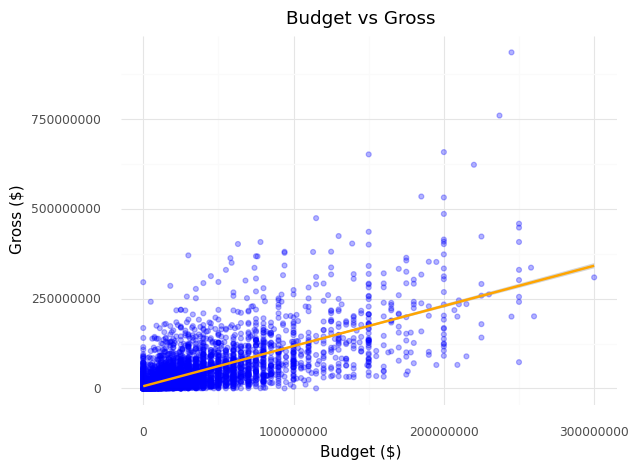

<ggplot: (315481658)>

In [9]:
(ggplot(data, aes(x = 'budget', y = 'gross')) 
 + geom_point(colour = 'blue', alpha = 0.30) 
 + theme_minimal() + ggtitle("Budget vs Gross") 
 + labs(x = "Budget ($)", y = "Gross ($)") 
 + geom_smooth(method = "lm", colour = 'orange')
)

# Question 1 Discussion Part 1
## What is the (general) relationship between movie budget and revenue (gross)?
- To understand the relationship between a movie's budget and its gross, the scatter plot was created above. The scatter plot has budget on the x-axis and gross on the y-axis. Budget is on the x-axis because it is the predictor variable (AKA independent variable) and gross is on the y-axis because it is the outcome that is being analyzed based on the budget. It can observed that generally as x (budget) increases, it can be expected the y (gross) value to increase. To confirm this trend, a best fit linear regression line was added. The regression line aligns with the observation that as x increases, it can be expected for y to increase because the slope of the regression line is positive and greater than 1. This is because the slope is slanted upwards. This slope that is positive and greater than 1 indicates that the relationship between budget and revenue is a positive linear relationship. 
- Our results are not too suprising because it makes sense for a movie to make more money (gross) if the movie's producers have more money (budget). Having a higher budget allows movie producers to have more resources, experiment with different ideas, and ultimately gives them a lot more opportunities to make a more successful (in terms of gross) movie. 
- In the next section, the question of whether this positive linear relationship is similar or different across movies made before 2000 vs movies made 2000 and after is explored.

In [10]:
# labsList = ['Movies Released Before 2000', 'Movies Released 2000 and After']
year_assignments = []
for i in data['year released']:
    if i >= 2000:
        year_assignments.append(1)
    else:
        year_assignments.append(0)
len(year_assignments)

6820

In [11]:
data['year_assignments'] = year_assignments
data.tail()

,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released,year_assignments
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,1,4750497,Absolutely Fabulous: The Movie,R,3,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,1
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,3,28368,Mothers and Daughters,PG-13,2,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,1
6817,3500000,Warner Bros. 7,USA,Sam Liu,Animation,7,3775000,Batman: The Killing Joke,R,3,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,1
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,3,25981,The Eyes of My Mother,R,3,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,1
6819,0,Les Productions du Trésor,France,Nicole Garcia,Drama,3,37757,From the Land of the Moon,R,3,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,1


In [12]:
labsList = ["Cluster " + str(i) for i in year_assignments]
label_titles = ['Movies Released Before 2000', 'Movies Released 2000 and After']
print("Testing out the labsList list: ")
print(labsList[1000])
print(labsList[6000])

Testing out the labsList list: 
Cluster 0
Cluster 1


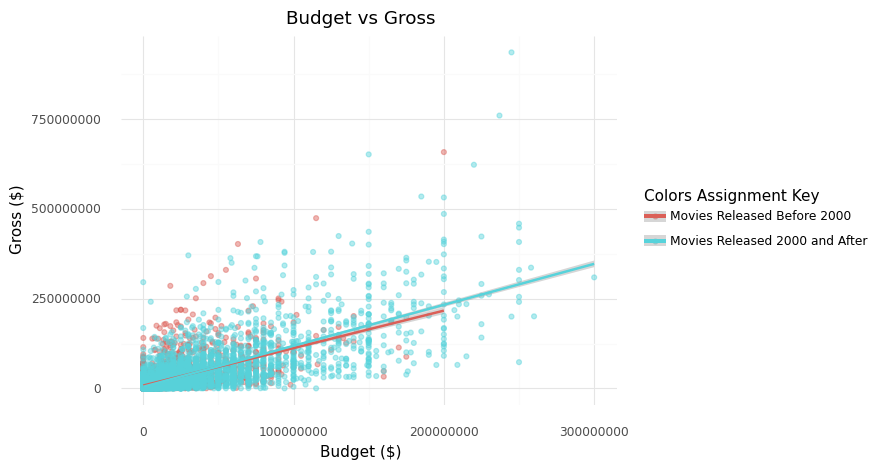

<ggplot: (315667291)>

In [13]:
(ggplot(data, aes(x = 'budget', y = 'gross', colour = "factor(year_assignments)")) 
 + geom_point(alpha = 0.45) 
 + theme_minimal() 
 + ggtitle("Budget vs Gross") 
 + labs(x = "Budget ($)", y = "Gross ($)") 
 + geom_smooth(method = "lm")
 + scale_color_discrete(name = "Colors Assignment Key",
                       labels = label_titles)
)

# Question 1 Discussion Part 2
## Is the relationship between movie budget and revenue (gross) different for movies that came out before 2000 compared to movies that came out after 2000?
- To understand if the relationship between budget and gross are different among movies made before 2000 vs movies made 2000 and after, another scatter plot was created. Once again, the x-axis is budget and the y-axis is gross. The main difference in this graph is that the 2 groups (movies before 2000s and movies 2000s+) are distinguised by different colors. The salmon/pink colored data points represent movies that were made before 2000. The light/sky blue color data points represent movies that were made 2000 and beyond. Each of the groups have their own best fit regression lines and are colored relative to their group colors. 
- It can be seen from the graph above, that 2 groups have very similar results. Both regression lines are positive and greater than 1 because they are slanted up and continue to go up as budget increases. These results suggest that generally it can be expected for a movie's gross to increase as its budget increases. 
- Although the regression lines are very similar, it should be noted that the group of movies released in 2000 and after is higher (in terms of gross) than the other regression line. This is most likely due to the fact that movies made 2000s and after are much more likely to have made more money/gross compared to movies made before 2000. This is not too suprising because the movie industry and its audience grows significantly over years especially over the last couple of years. Inflation may also be another reason as to why the movies made 2000 and after have a higher regression line. 

# Question 1 Explicit Answers to Parts 1 and 2

## Part 1: What is the (general) relationship between movie budget and revenue (gross)?
- **The relationship between movie budget and revenue is positive linear relationship.** Generally, as a movie's budget increases, it can be expected that its respected gross to increase as well.

## Part 2: Is the relationship between movie budget and revenue (gross) different for movies that came out before 2000 compared to movies that came out after 2000?
- **The relationship between movie budget and revenue is not different, except that for the movies made in 2000 and after CAN (not necessarily always) have higher grosses.**

# Question 2

## Using the number of user votes as a proxy for movie popularity, are certain genres, (action, drama, and adventure),  of movies more popular than others?

### Part 1: Boxplot of users votes across different genres
### Part 2: Barplot of average number of user votes across different genres
### Part 3: Barplot of count of movies from dataset across different genres

In [52]:
print("The dataset contains all of these genres: \n")
for i in data['genre'].unique():
    print(i)
print("\n")
print("However, only action, drama, and adventure are of interest for this question.")

The dataset contains all of these genres: 

Adventure
Comedy
Action
Drama
Crime
Thriller
Horror
Animation
Biography
Sci-Fi
Musical
Family
Fantasy
Mystery
War
Romance
Western


However, only action, drama, and adventure are of interest for this question.


In [15]:
print("All of the movies that are considered an action, drama, or adventure genre\nare found and then stored in the variable called data_genre_filtered")
desired_genres = ['Action', 'Adventure', 'Drama']
data_genre_filtered = data[data['genre'].isin(desired_genres)]
data_genre_filtered.head()

All of the movies that are considered an action, drama, or adventure genre
are found and then stored in the variable called data_genre_filtered


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released,year_assignments
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,0,52287414,Stand by Me,R,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,0
2,15000000,Paramount Pictures,USA,Tony Scott,Action,2,179800601,Top Gun,PG,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,0
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,2,85160248,Aliens,R,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,0
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,0,18564613,Flight of the Navigator,PG,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,0
5,6000000,Hemdale,UK,Oliver Stone,Drama,3,138530565,Platoon,R,3,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,0


In [16]:
action_median_user_votes = data_genre_filtered[data_genre_filtered['genre'] == 'Action']['votes'].median()
adventure_median_user_votes = data_genre_filtered[data_genre_filtered['genre'] == 'Adventure']['votes'].median()
drama_median_user_votes = data_genre_filtered[data_genre_filtered['genre'] == 'Drama']['votes'].median()
median_user_votes = data_genre_filtered['votes'].median()

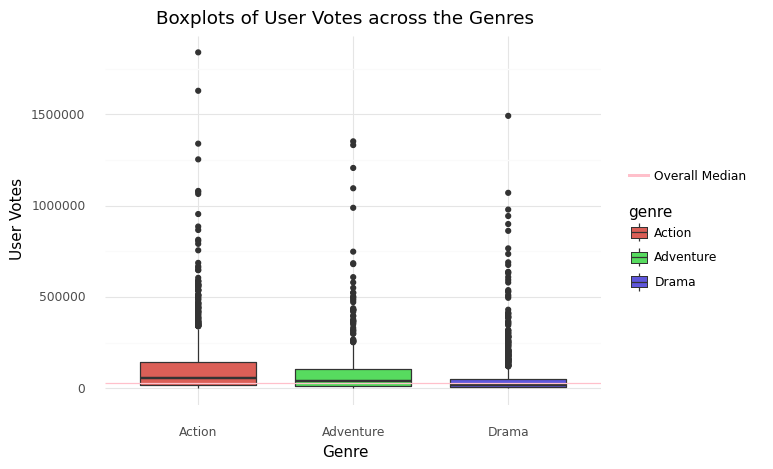

<ggplot: (315702890)>

In [17]:
(ggplot(data_genre_filtered, aes(x = 'genre', y='votes', fill = "genre")) 
 + geom_boxplot(stat = "boxplot") 
 + theme_minimal() 
 + ggtitle("Boxplots of User Votes across the Genres") 
 + labs(x = "Genre", y = "User Votes")
 + geom_hline(aes(yintercept = median_user_votes, color=["Overall Median"]), show_legend=True)
 + scale_color_manual(values="pink",name=' ')
)

In [18]:
print("The median number of user votes for Action movies is:\n" + str(action_median_user_votes) + "\n")
print("The median number of user votes for Adventure movies is:\n" + str(adventure_median_user_votes)+ "\n")
print("The median number of user votes for Drama movies is:\n" + str(drama_median_user_votes)+ "\n")

The median number of user votes for Action movies is:
55046.0

The median number of user votes for Adventure movies is:
39098.5

The median number of user votes for Drama movies is:
16435.5



# Question 2 Part 1 Discussion
- A boxplot (shown above) was created to help gain insight or a better understanding of the user votes variability across the 3 different genres of interest (Action - red, Adventure - green, Drama - blue). The boxplot above is an effective visualization of the distribution of user votes for each genre because it allows us to see the shape of the distribution of the data. The black horizontal lines within each box represent the median (value separating the higher half from the lower half of a data sample) number of user votes for that genre. It can be observed that the medians for each category is very small compared to the high points that fall out of their box's container. The pink line represents the median number of votes across all 3 genres. This overall median value is small like each genre's median which what is expected given the small medians for each genre. 
- These observations tell us that the large majority of movies do not have a great amount of votes. The very high user votes values across the different genres are outliers because these movies performed exceptionally well in regards to user votes. 
- The size of the boxes provide us with insight in terms of the amount of variability observed in each genre. Generally speaking, the larger a box is of a boxplot means that there is more variability of data in that sample. The Action genre has the largest box of all 3 boxes above, which indicates that Action genres have greater variability in terms of user votes. Adventure has the second most variability and drama has the least variability of these 3 genres.
- Concrete conslusions cannot be drawn with this knowledge but it is insightful to learn and expand upon to gain a better overall understanding of the data. For example, perhaps Action has the largest amount of variability because there are a lot of action movies. If there are a lot of movies in a certain genre, it may be more difficult for smaller movies of that genre to stand out and get user votes. To gain a better understanding of the different genres, barplots of the data is created next.

In [19]:
# init dict that will hold avg votes for each desired genre
user_votes_genres = {
    "Action": {
        "avg_user_votes": 0,
        "genre": 'Action',
        "count": 0
    },
    "Adventure": {
        "avg_user_votes": 0,
        "genre": "Adventure",
        "count": 0
    },
    "Drama": {
        "avg_user_votes": 0,
        "genre": "Drama",
        "count": 0
    }
}

# populate dict with avg votes for each genre
for key in user_votes_genres:
    user_votes_genres[key]['avg_user_votes'] = np.mean(data_genre_filtered[data_genre_filtered['genre'] == key]['votes'])
    user_votes_genres[key]['count'] = len(data_genre_filtered[data_genre_filtered['genre'] == key])
user_votes_genres

{'Action': {'avg_user_votes': 112157.26897069873,
  'genre': 'Action',
  'count': 1331},
 'Adventure': {'avg_user_votes': 106109.04081632652,
  'genre': 'Adventure',
  'count': 392},
 'Drama': {'avg_user_votes': 53389.16966759003,
  'genre': 'Drama',
  'count': 1444}}

In [20]:
# plt.bar(avg_user_votes_genres.keys(), avg_user_votes_genres.values())
DF_user_votes_genres = pd.DataFrame.from_dict(user_votes_genres, orient = 'index')
DF_user_votes_genres

,avg_user_votes,genre,count
Action,112157.268971,Action,1331
Adventure,106109.040816,Adventure,392
Drama,53389.169668,Drama,1444


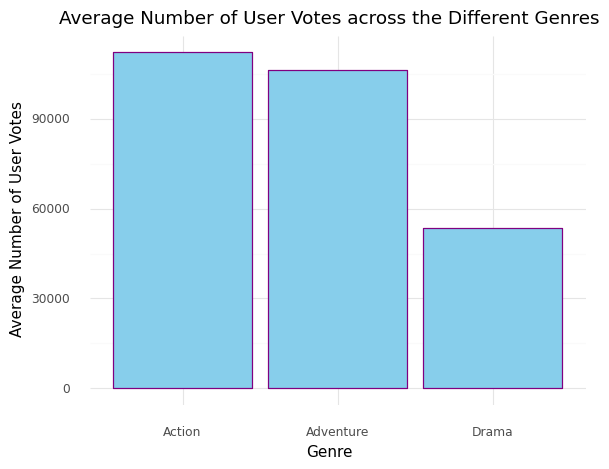

<ggplot: (315827658)>

In [21]:
(ggplot(DF_user_votes_genres, aes(x = 'genre', y='avg_user_votes')) 
 + geom_bar(stat = "identity", color = "purple", fill="skyblue") 
 + theme_minimal() 
 + ggtitle("Average Number of User Votes across the Different Genres") 
 + labs(x = "Genre", y = "Average Number of User Votes")
)

In [22]:
for key in user_votes_genres:
    print(key 
          + " has an average of about " 
          + str(round(user_votes_genres[key]['avg_user_votes'])) 
          + " user votes\n")

Action has an average of about 112157 user votes

Adventure has an average of about 106109 user votes

Drama has an average of about 53389 user votes



# Question 2 Part 2 Discussion
- A barplot (shown above) was created with each bar representing the average number of user votes for its respected genre. Action has the highest average number of votes with about 112,157 user votes. Adventure is the second highest average number of votes with about 106,109 votes and Drama has the least average number of user votes of about 53,389 votes. 
- This graph was created to help give a better understanding of the data that is being worked with for these genres. In the previous part, it was discovered that action has the greatest amount of variability, adventure the second, and drama the last. This descending order pattern is the same pattern observed with the average number of user votes above. Perhaps this is the case because of the existance of very high user votes outliers under the Action genre. Looking back at the boxplot from part 1, it can be observed that there are a siginificant number of outliers that are above the Action's box. Those high user votes values under Action are most likely responsible for Action's high average number of user votes as well as Action's large variability of user votes.

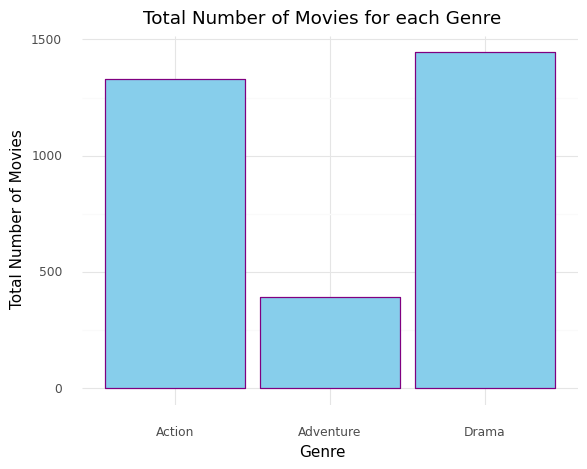

<ggplot: (315829628)>

In [23]:
(ggplot(DF_user_votes_genres, aes(x = 'genre', y='count')) 
 + geom_bar(stat = "identity", color = "purple", fill="skyblue") 
 + theme_minimal() 
 + ggtitle("Total Number of Movies for each Genre") 
 + labs(x = "Genre", y = "Total Number of Movies")
)

In [24]:
for key in user_votes_genres:
    print(key 
          + " has " 
          + str(round(user_votes_genres[key]['count'])) 
          + " total number of movies\n")

Action has 1331 total number of movies

Adventure has 392 total number of movies

Drama has 1444 total number of movies



# Question 2 Part 3 Discussion
- A barplot (shown above) was created with each bar representing the total number of movies in its respected genre. Drama has the most (1444) number of movies, Action has the second most (1331), and Adventure has the smallest number (392). This information is valuable because it provides insight about the data that is being worked with in these genres. Generally speaking, the more data a sample has, the more likely that the analysis or obersvations of/from that sample are reliable. Reliable meaning that the results or calculations of the dataset are not easily affected by outliers. With this in mind, it should be noted that the movies dataset provides significantly more Drama and Action movies compared to Adventure. And so observations/calculations of the Drama sample are not as reliable as the other genres. The Drama genre is much more susceptible to outliers compared to the other genres. Looking back at the boxplot, there are a significant number of outliers under the Adventure genre. So the Adventure genre's calculations are most likely being easily affected by its outliers.

# Question 2 Explicit Answer to the Question - are certain genres, (action, drama, and adventure), of movies more popular than others?

- **According to this dataset, Action movies seem to be the most popular, Adventure the second, and drama the third. The main reasoning behind this answer is that Action movies have both the highest average and the highest median user votes of the 3 genres from the dataset provided.**
- Although those are good reasons to believe Action is the highest, it should be noted that Action and Adventure movies have significantly greater variation in user votes compared to Drama movies. This is important to consider because these 2 genres (Action & Adventure) have signficant number of outliers with very high user votes (can be seen in the boxplot graph). Additionally, it should be noted that there are far less Adventure movies than the other 2 genres in this dataset which could potentially mean that the Adventure movies data is not as reliable in providing insight on the genre outside of the dataset. The lack in number of Adventure movies could also potentially indicate that there are less Adventure movies in general (not just this dataset) than the other genres. 

# Question 6

## What is the minimum number of features needed to predict whether a movie will gross over 250K and over 500K with at least 70% explained variance? 

In [25]:
cont_features = ['budget', 'runtime', 'score', 'votes', 'year released', 'gross']
cont_predictors = ['budget', 'runtime', 'score', 'votes', 'year released']

In [26]:
data_gross_cont_filtered = data[cont_features]
data_gross_cont_filtered.tail()

,budget,runtime,score,votes,year released,gross
6815,0,91,5.4,9161,2016,4750497
6816,0,90,4.9,1959,2016,28368
6817,3500000,76,6.5,36333,2016,3775000
6818,0,76,6.2,6947,2016,25981
6819,0,120,6.7,2411,2016,37757


### Creating new columns of binary outcome type data. One column for whether a movie made over 250K or not and another column for whether a movie made over 500K or not. A value of 1 represents 'True' and a value of 0 represents 'False':

In [27]:
z = StandardScaler()
gross_over_250k = []
gross_over_500k = []
for i in data_gross_cont_filtered['gross']:
    if i > 250000:
        gross_over_250k.append(1)
    else:
        gross_over_250k.append(0)
    if i > 500000:
        gross_over_500k.append(1)
    else:
        gross_over_500k.append(0)

print(len(gross_over_250k))
print(len(gross_over_500k))

6820
6820


## Showing that the data frame named 'data_gross_cont_filtered' contains the 2 new binary outcome columns:

In [28]:
data_gross_cont_filtered['gross_over_250k'] = gross_over_250k
data_gross_cont_filtered['gross_over_500k'] = gross_over_500k
data_gross_cont_filtered.tail(8)

,budget,runtime,score,votes,year released,gross,gross_over_250k,gross_over_500k
6812,0,96,5.7,4439,2016,23020,0,0
6813,0,120,6.2,6054,2016,228894,0,0
6814,20000000,107,6.3,19084,2016,36874745,1,1
6815,0,91,5.4,9161,2016,4750497,1,1
6816,0,90,4.9,1959,2016,28368,0,0
6817,3500000,76,6.5,36333,2016,3775000,1,1
6818,0,76,6.2,6947,2016,25981,0,0
6819,0,120,6.7,2411,2016,37757,0,0


## PCA Models:

### PCA Model for predicting gross over 250K

In [29]:
PCA_LR_Model_250k = LogisticRegression() # init an empty Logistic Regression model

# Use TTS with a 90/10 split (since data is large)
PCA_LR_X_train_250k, PCA_LR_X_test_250k, PCA_LR_y_train_250k, PCA_LR_y_test_250k = train_test_split(data_gross_cont_filtered[cont_predictors], data_gross_cont_filtered["gross_over_250k"], test_size=0.1)

# z-score predictors
PCA_LR_X_train_250k[cont_predictors] = z.fit_transform(PCA_LR_X_train_250k[cont_predictors]) # z-score and fit bc model is trained with train data
PCA_LR_X_test_250k[cont_predictors] = z.transform(PCA_LR_X_test_250k[cont_predictors]) # z-score but do not fit bc do not want to leak test data into model

PCA_Model_250k = PCA()
PCA_Model_250k.fit(PCA_LR_X_train_250k)

PCA()

In [30]:
# mapping of both training and testing set to the PCA Model
PCA_LR_X_train_250k = PCA_Model_250k.transform(PCA_LR_X_train_250k)
PCA_LR_X_test_250k = PCA_Model_250k.transform(PCA_LR_X_test_250k)

# apply PCA to the training set
PCA_LR_Model_250k.fit(PCA_LR_X_train_250k, PCA_LR_y_train_250k) # fit the X and y training data to the LR model

PCA_LR_y_pred_250k = PCA_LR_Model_250k.predict(PCA_LR_X_test_250k)

PCA_LR_mse_250k = mean_squared_error(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)
PCA_LR_r2_250k = r2_score(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)

print("PCA Logistic Regression Model ~ Mean Squared Error:\n" + str(round(PCA_LR_mse_250k, 3)) + "\n")
print("PCA Logistic Regression Model ~ r2 score:\n" + str(abs(round(PCA_LR_r2_250k, 3))))

PCA Logistic Regression Model ~ Mean Squared Error:
0.129

PCA Logistic Regression Model ~ r2 score:
0.126


## Discussion of Logistic Regressin Model's (for predicting gross over 250K) results

### What Mean Squared Error (mse) is and why it is important and used in this context:
- MSE is being used as a metric to measure the model's performance because it is a good metric to use to check how close the model's forecasts are to actual results. The mean squared error is sum of squared errors divided by the number of data points and is considered a loss function because it is a measure of well a model is doing. The mean squared error value tells approximately what error value can be expected from any data point on the Logistic Regression (LR) model. Like the sum of squared errors, the lower the mean squared error is (relative to the outcome units squared), the better the LR model is at predicting the outcome variable (y).

### Interpretation of mse from the Linear Regression Model:
- The mean squared error for the logistic regression model is about 0.139 as shown above. As discussed before, the mse is in terms of the outcome units squared. In this LR model, the y-value is gross in US dollars and so the error is simply US dollars squared. This error value is very small given that the units are dollars squared, however, it is difficult to make conclusions from the mse. The mse will be more helpful later on when it is compared to the PCA model's mse value. This is because comparing the values will provide insight on how much the error changed from using less components. To help get a better idea of how well the LR model is doing without comparing it to another model (PCA), r2 is calculated next. r2 is generally more insightful since it gives a standardized score (between 0 and 1).

### What r2 is and why it is important and used in this context:
- R2 is being used as a metric to measure the model's performance because it provides an understanding of the strength of the relationship between the predictor variables (budget, score, votes, etc) and the outcome (gross) in a standard scale (0 - 1). r2 represents the percentage of variance that is explained by the model. The closer the percentage or decimal value of r2 is to 1.0, the more the variation is explained by the model (as opposed to external factors/noises). In constrast, an r2 of 0 or close to 0 is an indicator that the model does a poor job of predicting the outcome because the variance is not explained by the model.

### Interpretation of r2 from the Linear Regression Model:
- The r2 value is very low, 0.123, as shown above. This low r2 value indicates the model is performing very poorly at predicting the outcome variable (gross) because the variation in our model's results are not being explained from the model itself. It is desired for the variation of a model to be explained by the predictors/features because that implies that the features are great choices for predicting the outcome variable of interest.

### PCA Model for predicting gross over 500K

In [31]:
PCA_LR_Model_500k = LogisticRegression() # init an empty Logistic Regression model

# Use TTS with a 90/10 split (since data is large)
PCA_LR_X_train_500k, PCA_LR_X_test_500k, PCA_LR_y_train_500k, PCA_LR_y_test_500k = train_test_split(data_gross_cont_filtered[cont_predictors], data_gross_cont_filtered["gross_over_500k"], test_size=0.1)

# z-score predictors
PCA_LR_X_train_500k[cont_predictors] = z.fit_transform(PCA_LR_X_train_500k[cont_predictors]) # z-score and fit bc model is trained with train data
PCA_LR_X_test_500k[cont_predictors] = z.transform(PCA_LR_X_test_500k[cont_predictors]) # z-score but do not fit bc do not want to leak test data into model

PCA_Model_500k = PCA()
PCA_Model_500k.fit(PCA_LR_X_train_500k)

PCA()

In [32]:
# mapping of both training and testing set to the PCA Model
PCA_LR_X_train_500k = PCA_Model_250k.transform(PCA_LR_X_train_500k)
PCA_LR_X_test_500k = PCA_Model_250k.transform(PCA_LR_X_test_500k)

# apply PCA to the training set
PCA_LR_Model_500k.fit(PCA_LR_X_train_500k, PCA_LR_y_train_500k) # fit the X and y training data to the LR model

PCA_LR_y_pred_500k = PCA_LR_Model_500k.predict(PCA_LR_X_test_500k)

PCA_LR_mse_500k = mean_squared_error(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)
PCA_LR_r2_500k = r2_score(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)

print("PCA Logistic Regression Model ~ Mean Squared Error:\n" + str(round(PCA_LR_mse_500k, 3)) + "\n")
print("PCA Logistic Regression Model ~ r2 score:\n" + str(round(abs(PCA_LR_r2_500k), 3)))

PCA Logistic Regression Model ~ Mean Squared Error:
0.151

PCA Logistic Regression Model ~ r2 score:
0.169


## Discussion of Logistic Regressin Model's (for predicting gross over 500K) results

### Interpretation of mse from the Linear Regression Model:
- The mean squared error for the logistic regression model is about 0.151 as shown above. This error value is very small given that the units are dollars squared, however, it is difficult to make conclusions from the mse. The mse will be more helpful later on when it is compared to the PCA model's mse value. To help get a better idea of how well the LR model is doing without comparing it to another model (PCA), r2 is calculated next.

### Interpretation of r2 from the Linear Regression Model:
- The r2 value is very low, 0.085, as shown above. This extremely low r2 value indicates the model is performing very poorly at predicting the outcome variable (gross) because the variation in our model's results are not being explained from the model itself.

## General commentary on the LR Models' performances
- The 2 Logistic Regression Models are performing very poorly in predicting their outcomes (gross). This tells us that the predictors - [budget, runtime, score, votes, year released] are terrible in predicting gross. And so **these LR Models are terrible in accomplishing what they were intended to predict, however, the Principle Component Analysis will still be performed next to demonstrate that nearly identical results can be achieved with less principle components (AKA predictors)**.

## Creating Dataframes of Principle Components

### Principle Components Dataframe for model predicting gross over 250K:

In [33]:
PCA_DF_250k = pd.DataFrame({
    "Explained_Variance": PCA_Model_250k.explained_variance_ratio_,
    "Principle_Components": range(1, 6),
    "Cumulative_Variance": PCA_Model_250k.explained_variance_ratio_.cumsum()
})

PCA_DF_250k.head()

,Explained_Variance,Principle_Components,Cumulative_Variance
0,0.421099,1,0.421099
1,0.218434,2,0.639533
2,0.159096,3,0.798629
3,0.130784,4,0.929413
4,0.070587,5,1.000000


### Principle Components Dataframe for model predicting gross over 500K:

In [34]:
PCA_DF_500k = pd.DataFrame({
    "Explained_Variance": PCA_Model_500k.explained_variance_ratio_,
    "Principle_Components": range(1, 6),
    "Cumulative_Variance": PCA_Model_500k.explained_variance_ratio_.cumsum()
})

PCA_DF_500k.head()

,Explained_Variance,Principle_Components,Cumulative_Variance
0,0.419364,1,0.419364
1,0.219917,2,0.639281
2,0.159000,3,0.798280
3,0.130211,4,0.928491
4,0.071509,5,1.000000


## Explanation principle components and explained variance:
- The priniciple components are the features: budget, runtime, score, votes, and year released. The explained variance is the percentage of variance that is being explained by the model. It is desirable for the explained variance to be as close to 100% as possible. This is because we want variation from the model to be explained from the predictors (AKA principle components) as opposed to outside noise. 

## Creating the PCA Skree Plots

### PCA Skree Plots for Model predicting gross over 250K:

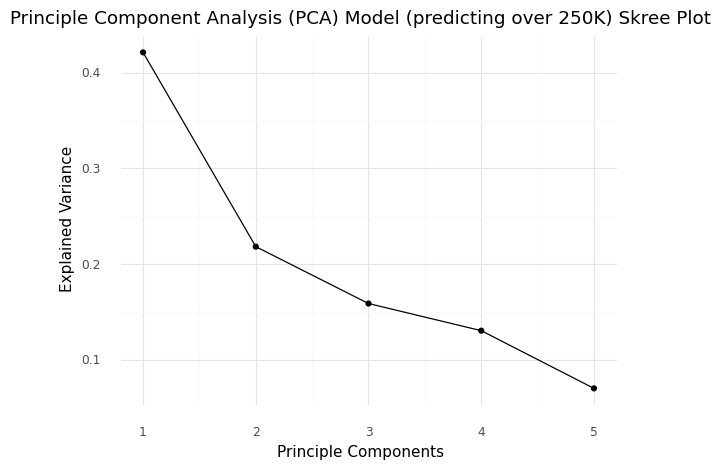

<ggplot: (315876060)>

In [35]:
# pca a scree plot
(ggplot(PCA_DF_250k, aes(x = "Principle_Components", y = "Explained_Variance")) 
 + geom_point() 
 + geom_line() 
 + theme_minimal() 
 + ggtitle("Principle Component Analysis (PCA) Model (predicting over 250K) Skree Plot") 
 + labs(x = "Principle Components", y = "Explained Variance")
)

## Explanation and interpretation of the Skree Plot for the PCA Model (predicting over 250K)
- The skree plot is a scatter plot that visually represents how much much variation is being explained from the addition of a principle component. For example looking at the first principle component, it can observed that about 42% of the variance is being explained by just the first principle component. In other words if a PCA model were to be created with only that first principle component, the results of the PCA model's predictions would be about 42% explained from that one predictor. The second principle component has an explained variance of about 22%. This indicates that the second component can explain about 22% of the model's variance. If the first 2 principle components' explained variances are combined, a cumulative variance of about 64% would be achieved. This technique of principle component analysis is very powerful because it allows data scientists to minimize the number of principle components they use in a model to achieve a desired expected variation percentage. It is important to minimize these principle components because the more principle components that are used in a model, the more computationally expensive it is to get calculations and predictions from a model.

### *Inversed Variant* PCA Skree Plots for Model predicting gross over 250K:

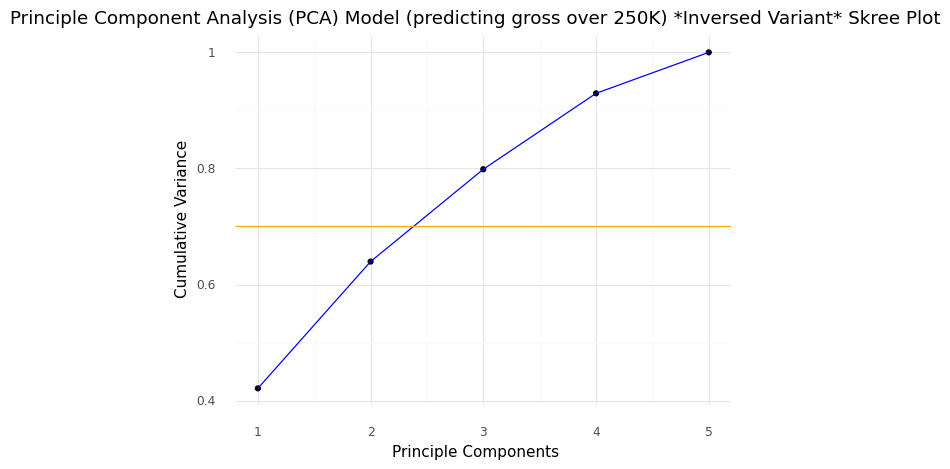

<ggplot: (315683295)>

In [36]:
# Figure out how many PCs you need to keep to retain 70% of the original variance.
(ggplot(PCA_DF_250k, aes(x = "Principle_Components", y = "Cumulative_Variance")) 
 + geom_point() 
 + geom_line(color = "blue") 
 + geom_hline(yintercept = 0.70, color = "orange") 
 + theme_minimal() + ggtitle("Principle Component Analysis (PCA) Model (predicting gross over 250K) *Inversed Variant* Skree Plot") + labs(x = "Principle Components", y = "Cumulative Variance")
)

### PCA Skree Plots for Model predicting gross over 500K:

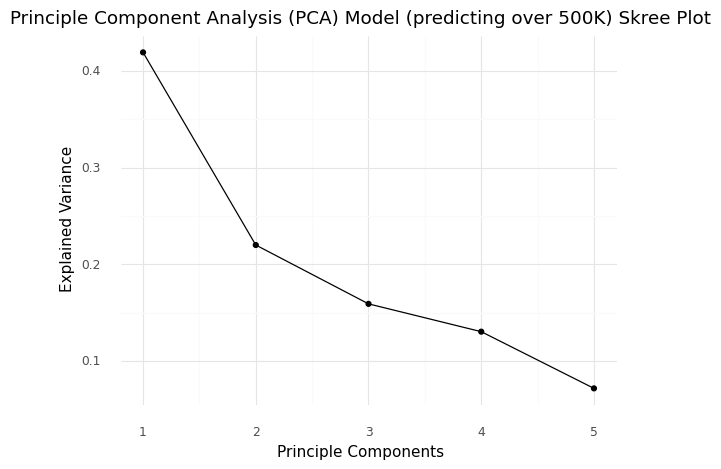

<ggplot: (315899938)>

In [37]:
# pca a scree plot
(ggplot(PCA_DF_500k, aes(x = "Principle_Components", y = "Explained_Variance")) 
 + geom_point() 
 + geom_line() 
 + theme_minimal() 
 + ggtitle("Principle Component Analysis (PCA) Model (predicting over 500K) Skree Plot") 
 + labs(x = "Principle Components", y = "Explained Variance")
)

## Interpretation of the Skree Plot for the PCA Model (predicting over 500K)
- Looking at the first principle component, it can observed that about 42% of the variance is being explained by just the first principle component. The second principle component has an explained variance of about 22%, which indicates that the second component can explain about 22% of the model's variance. If the first 2 principle components' explained variances are combined, a cumulative variance of about 64% is achieved.

### *Inversed Variant* PCA Skree Plots for Model predicting gross over 500K:

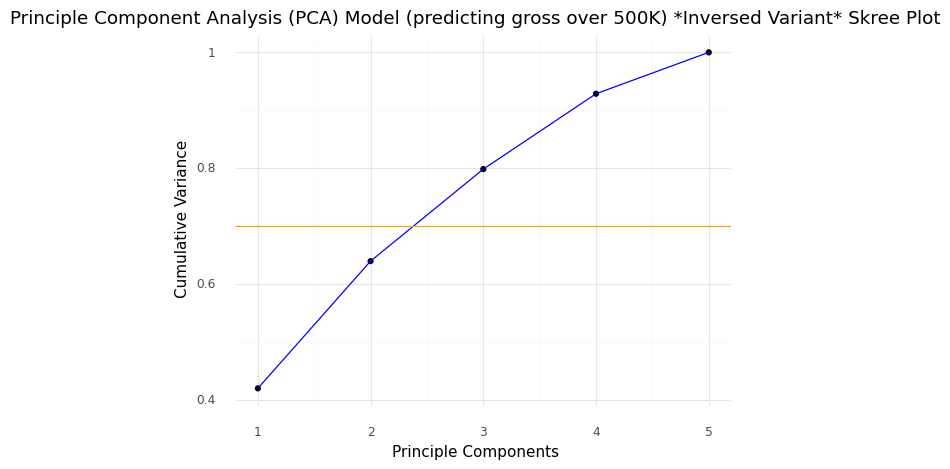

<ggplot: (315744958)>

In [38]:
# Figure out how many PCs you need to keep to retain 70% of the original variance.
(ggplot(PCA_DF_500k, aes(x = "Principle_Components", y = "Cumulative_Variance")) 
 + geom_point() 
 + geom_line(color = "blue") 
 + geom_hline(yintercept = 0.70, color = "orange") 
 + theme_minimal() + ggtitle("Principle Component Analysis (PCA) Model (predicting gross over 500K) *Inversed Variant* Skree Plot") 
 + labs(x = "Principle Components", y = "Cumulative Variance")
)

In [39]:
# method used to calculate the min number of principle components to achieve the threshold cumulative accuracy
def calc_min_pc(data_frame, col_name, threshold):
    pc_index = 0
    for pc in data_frame[col_name]:
        pc_index += 1
        if pc >= threshold:
            return pc_index

In [40]:
# figuring out how many PCs need to keep to retain 70% of the original variance
min_pc_250k = calc_min_pc(PCA_DF_250k, 'Cumulative_Variance', 0.70)
min_pc_500k = calc_min_pc(PCA_DF_500k, 'Cumulative_Variance', 0.70)

print("\n")
print("According to PCA, the Logistic Regression Model only needs " + str(min_pc_250k) + " Principle Components to predict a movie will gross over 250K with at least 70% accuracy")
print("\n")
print("According to PCA, the Logistic Regression Model only needs " + str(min_pc_500k) + " Principle Components to predict a movie will gross over 500K with at least 70% accuracy")
print("\n")



According to PCA, the Logistic Regression Model only needs 3 Principle Components to predict a movie will gross over 250K with at least 70% accuracy


According to PCA, the Logistic Regression Model only needs 3 Principle Components to predict a movie will gross over 500K with at least 70% accuracy




# Question 6 Explicit Answer to the Question - What is the minimum number of features needed to predict whether a movie will gross over 250K and over 500K with at least 70% explained variance?
- **The minimum number of features needed to predict whether a movie will gross over 250K and over 500K with at least 70% explained variance is both 3 principle components.**

## Creating new LR Models knowing now that only need 3 principle components
### We are creating these models to ensure that these models are in fact predicting with at least 70% explained variance

In [41]:
mod_PCA_Model_250k = PCA(n_components = min_pc_250k)
mod_PCA_Model_250k.fit(PCA_LR_X_train_250k)

PCA(n_components=3)

In [42]:
mod_PCA_Model_500k = PCA(n_components = min_pc_500k)
mod_PCA_Model_500k.fit(PCA_LR_X_train_500k)

PCA(n_components=3)

In [43]:
# 250k model
mod_train_y_pred_250k = PCA_LR_Model_250k.predict(PCA_LR_X_train_250k)

train_mod_mse_250k = mean_squared_error(PCA_LR_y_train_250k, mod_train_y_pred_250k)
test_mod_mse_250k = mean_squared_error(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)

train_mod_r2_250k = r2_score(PCA_LR_y_train_250k, mod_train_y_pred_250k)
test_mod_r2_250k = r2_score(PCA_LR_y_test_250k, PCA_LR_y_pred_250k)

# 500k model
mod_train_y_pred_500k = PCA_LR_Model_500k.predict(PCA_LR_X_train_500k)

train_mod_mse_500k = mean_squared_error(PCA_LR_y_train_500k, mod_train_y_pred_500k)
test_mod_mse_500k = mean_squared_error(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)

train_mod_r2_500k = r2_score(PCA_LR_y_train_500k, mod_train_y_pred_500k)
test_mod_r2_500k = r2_score(PCA_LR_y_test_500k, PCA_LR_y_pred_500k)

In [48]:
print("PCA Model (250k model) MSE (Train): " + str(round(train_mod_mse_250k, 3)))
print("PCA Model (250k model) MSE (Test): " + str(round(test_mod_mse_250k, 3)) + "\n")

print("PCA Model (250k model) r2 (Train): " + str(round(abs(train_mod_r2_250k), 3)))
print("PCA Model (250k model) r2 (Test): " + str(round(abs(test_mod_r2_250k), 3)))

PCA Model (250k model) MSE (Train): 0.111
PCA Model (250k model) MSE (Test): 0.129

PCA Model (250k model) r2 (Train): 0.114
PCA Model (250k model) r2 (Test): 0.126


## Discussion of the Logistic Regression Model built with the min number of principle components to predict gross over 250K with at least 70% explained variance
- This model gave an mse of about 0.129 and an r2 of about 0.126. The original version of this model has the same exact mse and r2 values. **The results are identical which is great because that means the new logistic regression models are able to achieve identitcal results while using only 3 principle components instead of all 5 principle components.**

### NOTE: The train mse and r2 values were calculated to ensure that the train and test values are similar. If these values are not similar, it can indicate the model is overfitting. Since the train and test values are very similar here, overfitting is not a concern.

In [51]:
print("PCA Model (500k model) MSE (Train): " + str(round(train_mod_mse_500k, 3)))
print("PCA Model (500k model) MSE (Test): " + str(round(test_mod_mse_500k, 3)) + "\n")

print("PCA Model (500k model) r2 (Train): " + str(round(abs(train_mod_r2_500k), 3)))
print("PCA Model (500k model) r2 (Test): " + str(round(abs(test_mod_r2_500k), 3)))

PCA Model (500k model) MSE (Train): 0.152
PCA Model (500k model) MSE (Test): 0.151

PCA Model (500k model) r2 (Train): 0.122
PCA Model (500k model) r2 (Test): 0.169


## Discussion of the Logistic Regression Model built with the min number of principle components to predict gross over 500K with at least 70% explained variance
- This model gave an mse of about 0.151 and an r2 of about 0.169. The original version of this model has the same exact mse and r2 values. **The results are identical which is great because that means the new logistic regression models are able to achieve identitcal results while using only 3 principle components instead of all 5 principle components.**

### NOTE: The train mse and r2 values were calculated for the same reasons mentioned before.